# Práctica 3 - IA en Educación

## Tarea 1

In [1]:
import pandas as pd

In [2]:
df_messages = pd.read_csv("data/forum_messages.csv")
df_topics = pd.read_csv("data/forum_topics.csv")

In [3]:
# Mostrar las primeras filas
df_messages.head()

,Id,ForumTopicId,PostUserId,PostDate,ReplyToForumMessageId,Message,Medal,MedalAwardDate
0,1680657,230748,6260570,2022-02-08 00:26:04,1263527.0,"Nice feature, thanks!",NaN,NaN
1,1680081,295170,4554096,2022-02-07 15:10:43,1618205.0,This is great!!!,NaN,NaN
2,1679992,295170,1178699,2022-02-07 14:14:10,1678824.0,Hi - thanks for your suggestion! We're alway...,NaN,NaN
3,1678824,295170,2589411,2022-02-06 20:06:25,1618205.0,Hi thanks for the feature it seems useful. Do...,NaN,NaN
4,1678817,302113,2589411,2022-02-06 19:56:57,1658292.0,"Great updates. for you to know, sometimes the ...",NaN,NaN


In [4]:
# Mostrar las primeras filas
df_topics.head()

,Id,ForumId,KernelId,LastForumMessageId,FirstForumMessageId,CreationDate,LastCommentDate,Title,IsSticky,TotalViews,Score,TotalMessages,TotalReplies,feedback_type
0,302908,809,NaN,1670877.0,1663249.0,2022-01-24 23:05:57,02/01/2022 00:24:12,[Product Update] Increased session runtimes fo...,True,0,43,11,10,product_update
1,302113,809,NaN,1678817.0,1658292.0,2022-01-20 22:41:06,02/06/2022 19:56:57,[Notebooks Update] Revised dark theme for the ...,True,0,16,17,16,product_update
2,295394,809,NaN,1641954.0,1619355.0,2021-12-15 21:15:06,01/07/2022 21:12:00,[Product Update] New and improved global navig...,True,0,16,3,2,product_update
3,295170,809,NaN,1680081.0,1618205.0,2021-12-14 18:50:32,02/07/2022 15:10:43,[Feature Launch]: Save Notebooks to GitHub,True,0,50,61,60,product_launch
4,294337,809,NaN,1646927.0,1613404.0,2021-12-09 23:40:36,01/12/2022 07:17:18,[Product Launch] Introducing Community Competi...,True,0,46,18,17,product_launch


## Tarea 2

### Detección de tópicos

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# ----------------------------- PASO 1: PREPROCESAMIENTO -----------------------------

# Preprocesamiento de texto
def clean_text(text):
    if pd.isna(text):
        return ""
    return text.lower()

df_messages["Cleaned_Message"] = df_messages["Message"].apply(clean_text)

In [6]:
# ----------------------------- PASO 2: DETECCIÓN DE TEMAS -----------------------------

# Vectorizar el texto con TF-IDF para la detección de temas
vectorizer = TfidfVectorizer(stop_words="english", max_features=500)
X = vectorizer.fit_transform(df_messages["Cleaned_Message"])

# Aplicar LDA para detectar los temas más recurrentes
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Asignar temas a cada mensaje
df_messages["Topic"] = lda.transform(X).argmax(axis=1)

# Obtener las palabras clave por tema
words = vectorizer.get_feature_names_out()
topics = []
for topic_idx, topic in enumerate(lda.components_):
    top_words = [words[i] for i in topic.argsort()[:-11:-1]]
    topics.append({"Topic": f"Tema {topic_idx+1}", "Top Words": ", ".join(top_words)})

# Convertir en DataFrame y mostrar
df_topics_lda = pd.DataFrame(topics)

In [7]:
import pyLDAvis
import pyLDAvis.lda_model

# Visualización interactiva con pyLDAvis
lda_vis = pyLDAvis.lda_model.prepare(lda, X, vectorizer)
pyLDAvis.display(lda_vis)

In [8]:
topics

[{'Topic': 'Tema 1',
  'Top Words': 'notebook, good, useful, version, thanks, like, new, love, github, yes'},
 {'Topic': 'Tema 2',
  'Top Words': 'thanks, team, sharing, issue, ll, know, feedback, thank, hi, look'},
 {'Topic': 'Tema 3',
  'Top Words': 'gpu, really, instance, gcp, cool, did, quota, notebooks, hours, help'},
 {'Topic': 'Tema 4',
  'Top Words': 'great, thanks, thank, nice, feature, awesome, wow, work, lot, news'},
 {'Topic': 'Tema 5',
  'Top Words': 'dataset, script, kernel, data, datasets, kernels, notebook, kaggle, add, utility'}]

Hemos realizado este ejercicio mediante el uso de la vectorización por la técnica TFIDF y posteriormente la detección de tópicos en los mensajes del foro mediante el uso de LDA con 5 componentes, que podemos clasificar como:

- Tema 1: Relacionado con notebooks, versiones y comentarios positivos.
- Tema 2: Feedback general, problemas y comunicación con el equipo de Kaggle.
- Tema 3: Uso de GPU en GCP, cuotas y rendimiento.
- Tema 4: Agradecimientos y reacciones a nuevas características.
- Tema 5: Trabajo con datasets y kernels en Kaggle.


### Identificar temas con más dudas

Hemos identificado los temas con más dudas en los foros, considerando tanto el **número de respuestas** como la **cantidad de preguntas explícitas** en los mensajes.

In [9]:
df_messages

,Id,ForumTopicId,PostUserId,PostDate,ReplyToForumMessageId,Message,Medal,MedalAwardDate,Cleaned_Message,Topic
0,1680657,230748,6260570,2022-02-08 00:26:04,1263527.0,"Nice feature, thanks!",NaN,NaN,"nice feature, thanks!",3
1,1680081,295170,4554096,2022-02-07 15:10:43,1618205.0,This is great!!!,NaN,NaN,this is great!!!,3
2,1679992,295170,1178699,2022-02-07 14:14:10,1678824.0,Hi - thanks for your suggestion! We're alway...,NaN,NaN,hi - thanks for your suggestion! we're alway...,0
3,1678824,295170,2589411,2022-02-06 20:06:25,1618205.0,Hi thanks for the feature it seems useful. Do...,NaN,NaN,hi thanks for the feature it seems useful. do...,0
4,1678817,302113,2589411,2022-02-06 19:56:57,1658292.0,"Great updates. for you to know, sometimes the ...",NaN,NaN,"great updates. for you to know, sometimes the ...",1
...,...,...,...,...,...,...,...,...,...,...
1731,179823,32423,128750,2017-05-02 22:56:48,NaN,"Amazing!\n\nBy the way, all that data might re...",3.0,05/02/2017,"amazing!\n\nby the way, all that data might re...",1
1732,179816,32423,982571,2017-05-02 21:33:05,NaN,"Great , Nice feature , can't want to try it out.",3.0,05/02/2017,"great , nice feature , can't want to try it out.",3
1733,179781,32423,417337,2017-05-02 21:04:39,NaN,Love this! Awesome new feature. Now I can spen...,3.0,05/02/2017,love this! awesome new feature. now i can spen...,3
1734,179775,32423,505747,2017-05-02 20:35:39,NaN,"Wow, this is really great! Nice work guys",3.0,05/02/2017,"wow, this is really great! nice work guys",3


In [10]:
# ----------------------------- PASO 3: DETECTAR TEMAS CON MÁS DUDAS -----------------------------
import spacy
nlp = spacy.load("en_core_web_sm")

def is_question_spacy(text):
    doc = nlp(text)
    # Preguntas típicas comienzan con verbos auxiliares
    question_words = {'what', 'why', 'how', 'where', 'when', 'who', 'which'}
    if any(token.lower_ in question_words for token in doc):
        return True
    if any(token.tag_ == "WP" or token.tag_ == "WRB" for token in doc):
        return True
    return False

/Users/jorgegarcelan/Desktop/UNI/5-MASTER IAA/SC3/IA EDUCACIÓN/IAA-Educacion/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [11]:
# Contar la cantidad de respuestas por tema
df_replies = df_messages.groupby("Topic")["ReplyToForumMessageId"].count().reset_index()
df_replies.columns = ["Topic", "Num_Replies"]

df_messages['Has_Question'] = df_messages['Cleaned_Message'].apply(is_question_spacy)
df_questions = df_messages.groupby("Topic")["Has_Question"].sum().reset_index()
df_questions.columns = ["Topic", "Num_Questions"]

# Unir ambas métricas y ordenar por mayor número de dudas
df_doubts = df_replies.merge(df_questions, on="Topic").sort_values(by="Num_Questions", ascending=False)
df_doubts

,Topic,Num_Replies,Num_Questions
4,4,232,162
0,0,285,141
1,1,272,110
2,2,207,88
3,3,173,14


Hemos utilizado **spaCy**, una librería de procesamiento de lenguaje natural, especialmente su capacidad de etiquetado gramatical (*Part-of-Speech tagging*) para detectar preguntas en los mensajes. Concretamente, nos hemos apoyado en las etiquetas morfosintácticas generadas por spaCy (por ejemplo, etiquetas como `WP` o `WRB`) para identificar la presencia de pronombres interrogativos y adverbios interrogativos. De esta forma hemos detectado automáticamente mensajes que planteaban dudas o preguntas explícitas, facilitando así la identificación del tema con mayor número de dudas (**tema 4**).

## Tarea 3

### Detección de sentimientos

/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_20030/2879476080.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, ax=ax, palette=colors)


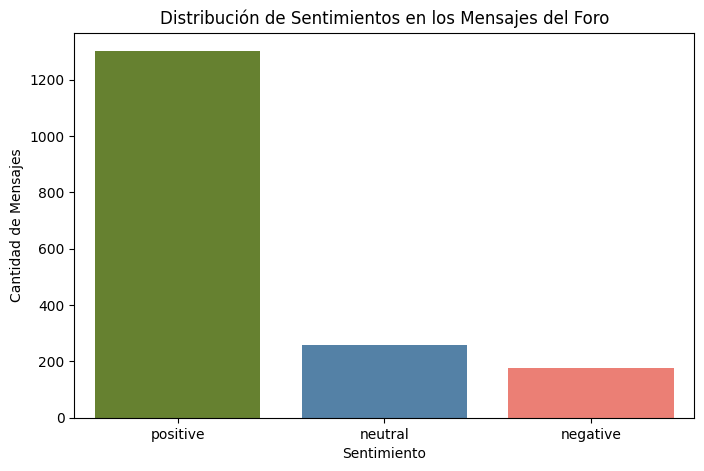

In [12]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Función para analizar el sentimiento
def get_sentiment(text):
    if pd.isna(text) or text.strip() == "":
        return "neutral"
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"

# Aplicar análisis de sentimiento a los mensajes
df_messages["Sentiment"] = df_messages["Message"].apply(get_sentiment)

# Contar la cantidad de mensajes por sentimiento
sentiment_counts = df_messages["Sentiment"].value_counts()

# Definir una paleta de colores personalizada
colors = ["#6B8E23", "#4682B4", "#FF6F61"]  # Verde Oliva, Azul Acero, Rojo

# Graficar la distribución de sentimientos con colores personalizados
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, ax=ax, palette=colors)
ax.set_xlabel("Sentimiento")
ax.set_ylabel("Cantidad de Mensajes")
ax.set_title("Distribución de Sentimientos en los Mensajes del Foro")
plt.show()

En este gráfico podemos observar claramente que **el sentimiento predominante en los mensajes del foro es positivo**, con una gran diferencia frente a los mensajes neutrales y negativos. La baja cantidad de mensajes negativos indica que, en general, los participantes mantienen una actitud favorable hacia los temas tratados. Esta información puede ser valiosa para identificar y reforzar las prácticas que están generando satisfacción en los estudiantes.

### Temáticas con más sentimientos negativos

In [13]:
# Contar la cantidad de mensajes negativos por tema
df_negative_sentiment = df_messages[df_messages["Sentiment"] == "negative"].groupby("Topic")["Sentiment"].count().reset_index()
df_negative_sentiment.columns = ["Topic", "Num_Negative_Messages"]

# Ordenar por los temas con más mensajes negativos
df_negative_sentiment_sorted = df_negative_sentiment.sort_values(by="Num_Negative_Messages", ascending=False)
df_negative_sentiment_sorted

,Topic,Num_Negative_Messages
2,2,47
0,0,45
4,4,42
1,1,36
3,3,6


En esta tabla observamos que el **Tema 2 ("Feedback general, problemas y comunicación con el equipo de Kaggle") presenta la mayor cantidad de mensajes negativos (47)**. Esto podría indicar insatisfacción o dificultades por parte de los estudiantes relacionadas con la interacción y resolución de problemas. Por otro lado, el Tema 3 ("Uso de GPU en GCP, cuotas y rendimiento") es el que menos mensajes negativos tiene (solo 6), sugiriendo que los alumnos enfrentan menos inconvenientes en este aspecto o tienen una actitud más positiva hacia estos recursos técnicos.

## Tarea 4

### Nube de palabras

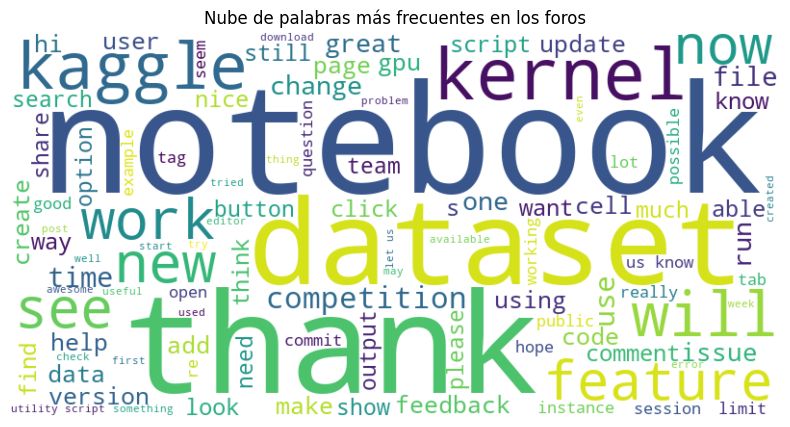

In [14]:
from wordcloud import WordCloud

# -------------------- 1. NUBE DE PALABRAS --------------------

# Concatenar todos los mensajes en un solo texto
all_text = " ".join(df_messages["Cleaned_Message"].dropna())

# Generar una nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=100).generate(all_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de palabras más frecuentes en los foros")
plt.show()

### Detección de palabras clave en mensajes negativos

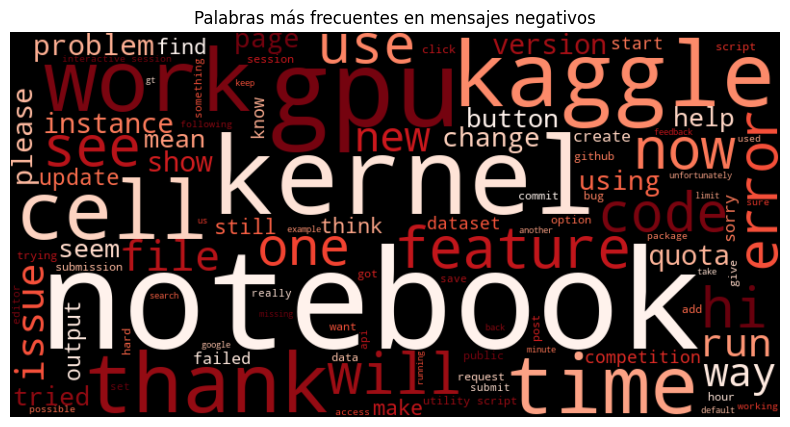

In [15]:
# -------------------- 2. PALABRAS MÁS FRECUENTES EN MENSAJES NEGATIVOS --------------------

# Filtrar solo mensajes negativos
negative_text = " ".join(df_messages[df_messages["Sentiment"] == "negative"]["Cleaned_Message"].dropna())

# Generar nube de palabras para mensajes negativos
wordcloud_neg = WordCloud(width=800, height=400, background_color="black", colormap="Reds", max_words=100).generate(negative_text)

# Mostrar la nube de palabras para mensajes negativos
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Palabras más frecuentes en mensajes negativos")
plt.show()


### Análisis de la longitud de los mensajes

In [16]:
# Agregar una columna con la longitud del mensaje
df_messages["Message_Length"] = df_messages["Cleaned_Message"].apply(lambda x: len(x.split()))

# Calcular el promedio de longitud por tipo de sentimiento
length_by_sentiment = df_messages.groupby("Sentiment")["Message_Length"].mean().reset_index()
length_by_sentiment.columns = ["Sentiment", "Avg_Message_Length"]
length_by_sentiment

,Sentiment,Avg_Message_Length
0,negative,43.346591
1,neutral,16.988372
2,positive,45.516129


Los mensajes negativos y positivos son más largos en comparación con los neutrales. Esto sugiere que los usuarios dedican más palabras a expresar satisfacción o insatisfacción con un producto o funcionalidad.

Sin embargo, los mensajes neutrales suelen ser más cortos y directos.